In [47]:
#!pip install tensorflow
import pickle
from pandas import read_csv


In [48]:
print("Loading data...")
training_file = './Data/train.p'

sign_names = read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
images_train, labels_train = train['features'], train['labels']

for i in range(len(labels_train)):
 
    # replace hardik with shardul
    if labels_train[i] < 9:
        labels_train[i] = 0
    elif labels_train[i] >= 9:
        labels_train[i] = 1

Loading data...


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import f1_score

# Assuming your image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

def f1_metric(y_true, y_pred):
    return tf.py_function(f1_score, (y_true, y_pred > 0.5), tf.float64)

# Define the new model
model = Sequential([
    # First Convolutional Layer with 32 filters, a 3x3 kernel size, 'same' padding, and ReLU activation
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(height, width, channels)),
    
    # MaxPooling to downsample the output of the first Convolutional Layer
    MaxPooling2D((2, 2)),
    
    # Second Convolutional Layer with 64 filters, a 3x3 kernel size, 'same' padding, and ReLU activation
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    
    # MaxPooling to downsample the output of the second Convolutional Layer
    MaxPooling2D((2, 2)),
    
    # Third Convolutional Layer with 128 filters, a 3x3 kernel size, 'same' padding, and ReLU activation
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    
    # MaxPooling to downsample the output of the third Convolutional Layer
    MaxPooling2D((2, 2)),
    
    # Additional Dropout layer after the third Convolutional Layer
    Dropout(0.3),  

    # Flatten layer to convert the 2D output of the convolutional layers into a 1D array
    Flatten(),
    
    # First Dense (fully connected) layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    
    # Dropout layer with 50% dropout rate for regularization
    Dropout(0.5),
    
    # Second Dense layer with 64 units and ReLU activation
    Dense(64, activation='relu'),
    
    # Output layer for binary classification using sigmoid activation
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_metric])

print("Finished building model...")

Finished building model...


In [50]:
validation_file = './Data/valid.p'

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
images_valid, labels_valid = valid['features'], valid['labels']

for i in range(len(labels_valid)):
    if labels_valid[i] < 9:
        labels_valid[i] = 0
    elif labels_valid[i] >= 9:
        labels_valid[i] = 1

In [51]:
# model.fit(images_train, labels_train, epochs=10, validation_data=(images_valid, labels_valid))
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_valid, labels_valid))

Epoch 1/10
1086/1088 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9300 - f1_metric: 0.9485

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 25s 22ms/step - loss: 0.2040 - accuracy: 0.9301 - f1_metric: 0.9486 - val_loss: 0.0987 - val_accuracy: 0.9735 - val_f1_metric: 0.7273
Epoch 2/10
   4/1088 [..............................] - ETA: 24s - loss: 0.1402 - accuracy: 0.9453 - f1_metric: 0.9544

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


1087/1088 [============================>.] - ETA: 0s - loss: 0.0399 - accuracy: 0.9885 - f1_metric: 0.9911

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 22s 20ms/step - loss: 0.0399 - accuracy: 0.9885 - f1_metric: 0.9911 - val_loss: 0.0137 - val_accuracy: 0.9986 - val_f1_metric: 0.7315
Epoch 3/10
   4/1088 [..............................] - ETA: 23s - loss: 0.0029 - accuracy: 1.0000 - f1_metric: 1.0000

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1086/1088 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9923 - f1_metric: 0.9940

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 22s 20ms/step - loss: 0.0278 - accuracy: 0.9923 - f1_metric: 0.9940 - val_loss: 0.0187 - val_accuracy: 0.9948 - val_f1_metric: 0.7294
Epoch 4/10
   4/1088 [..............................] - ETA: 22s - loss: 0.0263 - accuracy: 0.9844 - f1_metric: 0.9889

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1087/1088 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9943 - f1_metric: 0.9956

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 23s 21ms/step - loss: 0.0213 - accuracy: 0.9943 - f1_metric: 0.9956 - val_loss: 0.0807 - val_accuracy: 0.9746 - val_f1_metric: 0.7267
Epoch 5/10
1086/1088 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9936 - f1_metric: 0.9951

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 21s 19ms/step - loss: 0.0235 - accuracy: 0.9936 - f1_metric: 0.9951 - val_loss: 0.0031 - val_accuracy: 0.9991 - val_f1_metric: 0.7314
Epoch 6/10
   4/1088 [..............................] - ETA: 22s - loss: 5.8106e-04 - accuracy: 1.0000 - f1_metric: 1.0000

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1087/1088 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9952 - f1_metric: 0.9963

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 21s 19ms/step - loss: 0.0185 - accuracy: 0.9952 - f1_metric: 0.9963 - val_loss: 0.0269 - val_accuracy: 0.9941 - val_f1_metric: 0.7303
Epoch 7/10
   4/1088 [..............................] - ETA: 21s - loss: 0.0020 - accuracy: 1.0000 - f1_metric: 1.0000    

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1086/1088 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9958 - f1_metric: 0.9968

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 21s 19ms/step - loss: 0.0144 - accuracy: 0.9958 - f1_metric: 0.9968 - val_loss: 0.0165 - val_accuracy: 0.9955 - val_f1_metric: 0.7309
Epoch 8/10
   4/1088 [..............................] - ETA: 20s - loss: 0.0123 - accuracy: 0.9922 - f1_metric: 0.9942

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1086/1088 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9961 - f1_metric: 0.9970

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 23s 21ms/step - loss: 0.0169 - accuracy: 0.9961 - f1_metric: 0.9970 - val_loss: 0.0036 - val_accuracy: 0.9984 - val_f1_metric: 0.7316
Epoch 9/10
   4/1088 [..............................] - ETA: 23s - loss: 3.4883e-04 - accuracy: 1.0000 - f1_metric: 1.0000

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1086/1088 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9965 - f1_metric: 0.9973

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 22s 20ms/step - loss: 0.0163 - accuracy: 0.9964 - f1_metric: 0.9973 - val_loss: 0.0108 - val_accuracy: 0.9986 - val_f1_metric: 0.7317
Epoch 10/10
   4/1088 [..............................] - ETA: 23s - loss: 0.0329 - accuracy: 0.9844 - f1_metric: 0.9868

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1087/1088 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9976 - f1_metric: 0.9982

/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

1088/1088 [==============================] - 22s 20ms/step - loss: 0.0079 - accuracy: 0.9976 - f1_metric: 0.9982 - val_loss: 0.0042 - val_accuracy: 0.9991 - val_f1_metric: 0.7316


/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/jonasbrockmoller/Documents/GitHub/Traffic-Sign-Recognition/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `z

In [52]:
# Define the file name for saving the model
model_filename = 'Convolution_Model_Saved'

# Save the model to a file
model.save(model_filename)

INFO:tensorflow:Assets written to: Convolution_Model_Saved/assets


INFO:tensorflow:Assets written to: Convolution_Model_Saved/assets


In [53]:
test_file = './Data/test.p'

with open(test_file, mode='rb') as f:
    test = pickle.load(f)
images_test, labels_test = test['features'], test['labels']

for i in range(len(labels_test)):
 
    # replace hardik with shardul
    if labels_test[i] < 9:
        labels_test[i] = 0
    elif labels_test[i] >= 9:
        labels_test[i] = 1

In [54]:
test_loss, test_accuracy, f1_score  = model.evaluate(images_test, labels_test)

395/395 [==============================] - 3s 8ms/step - loss: 0.0220 - accuracy: 0.9963 - f1_metric: 0.9972


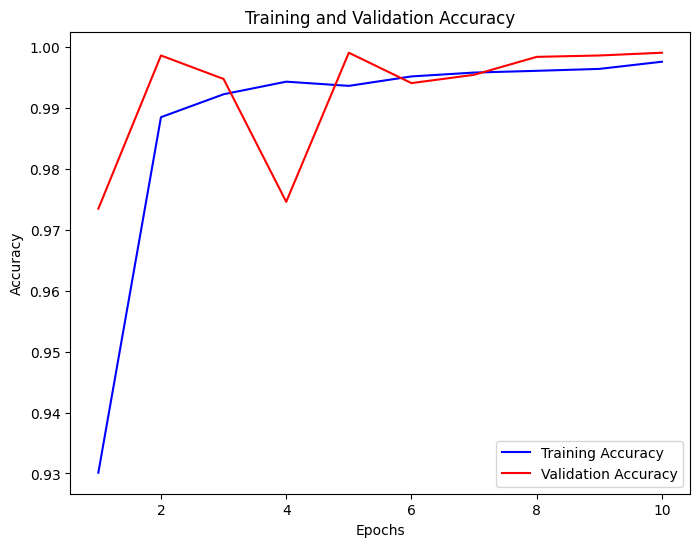

In [55]:
import matplotlib.pyplot as plt
 
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
 
# Plot accuracy
fig = plt.figure(figsize=(8, 6))
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
fig.savefig('binary_cnn.png', dpi=fig.dpi)